<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание.-Кластеризация." data-toc-modified-id="Домашнее-задание.-Кластеризация.-1">Домашнее задание. Кластеризация.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-1.0.1">Данные</a></span></li><li><span><a href="#Обязательное-задание" data-toc-modified-id="Обязательное-задание-1.0.2">Обязательное задание</a></span></li><li><span><a href="#Дополнительные-задания" data-toc-modified-id="Дополнительные-задания-1.0.3">Дополнительные задания</a></span></li><li><span><a href="#1.-Импорт-библиотек" data-toc-modified-id="1.-Импорт-библиотек-1.0.4">1. Импорт библиотек</a></span></li><li><span><a href="#2.-Чтение-данных" data-toc-modified-id="2.-Чтение-данных-1.0.5">2. Чтение данных</a></span></li><li><span><a href="#3.-KMeans" data-toc-modified-id="3.-KMeans-1.0.6">3. KMeans</a></span></li><li><span><a href="#4.-AgglomerativeClustering" data-toc-modified-id="4.-AgglomerativeClustering-1.0.7">4. AgglomerativeClustering</a></span><ul class="toc-item"><li><span><a href="#С-параметром-linkage='single'" data-toc-modified-id="С-параметром-linkage='single'-1.0.7.1">С параметром linkage='single'</a></span></li><li><span><a href="#С-параметром-linkage='ward'" data-toc-modified-id="С-параметром-linkage='ward'-1.0.7.2">С параметром linkage='ward'</a></span></li></ul></li><li><span><a href="#5.-DBSCAN" data-toc-modified-id="5.-DBSCAN-1.0.8">5. DBSCAN</a></span></li><li><span><a href="#6.-AffinityPropagation" data-toc-modified-id="6.-AffinityPropagation-1.0.9">6. AffinityPropagation</a></span></li><li><span><a href="#7.-Исследование-скопления-голосов-за-и-против" data-toc-modified-id="7.-Исследование-скопления-голосов-за-и-против-1.0.10">7. Исследование скопления голосов за и против</a></span></li></ul></li></ul></li></ul></div>

# Домашнее задание. Кластеризация.

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

### 1. Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

### 2. Чтение данных

In [2]:
df = pd.read_excel('geo.xlsx', index_col=0)

In [3]:
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x              108806 non-null  float64
 1   y              108806 non-null  float64
 2   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


<AxesSubplot:xlabel='x', ylabel='y'>

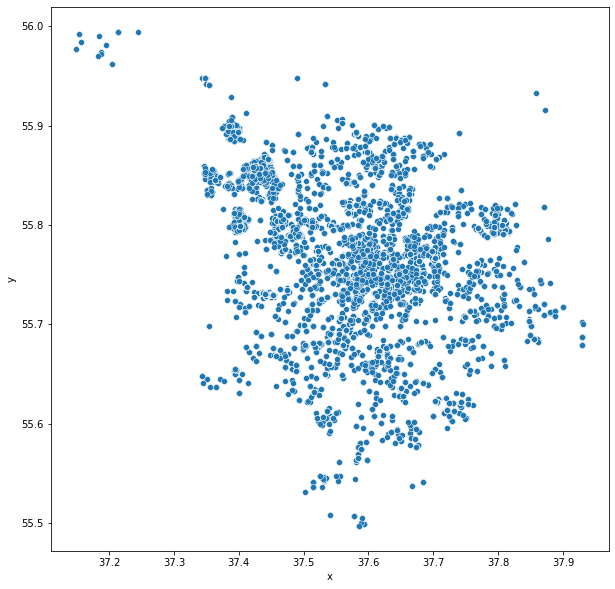

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='x', y='y')

### 3. KMeans

In [6]:
k_inertia = []
ks = range(1,25)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = clf_kmeans.fit_predict(df.drop(columns='comment_class'))
    k_inertia.append(clf_kmeans.inertia_)

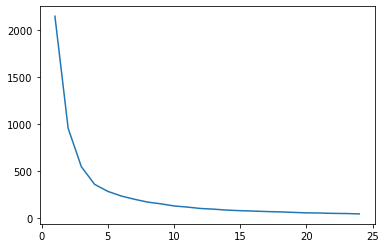

In [7]:
plt.plot(ks, k_inertia)

In [8]:
# оптимальное значение кластеров

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

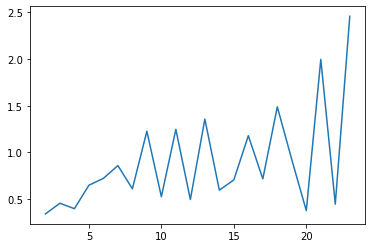

In [9]:
plt.plot(ks[1:-1], diff_r)

In [10]:
clf_kmeans = KMeans(n_clusters=12)

y_pred = clf_kmeans.fit_predict(df.drop(columns='comment_class'))

<AxesSubplot:xlabel='x', ylabel='y'>

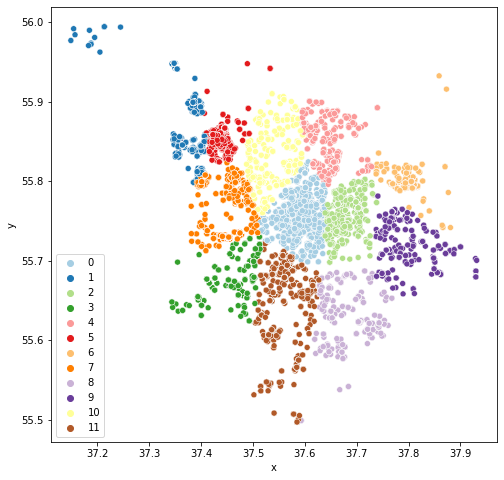

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='x', y='y', hue=y_pred, legend='full', palette='Paired')

### 4. AgglomerativeClustering

#### С параметром linkage='single'

In [12]:
clf_aggcl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')

clf_aggcl = clf_aggcl.fit(df.drop(columns='comment_class'))

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

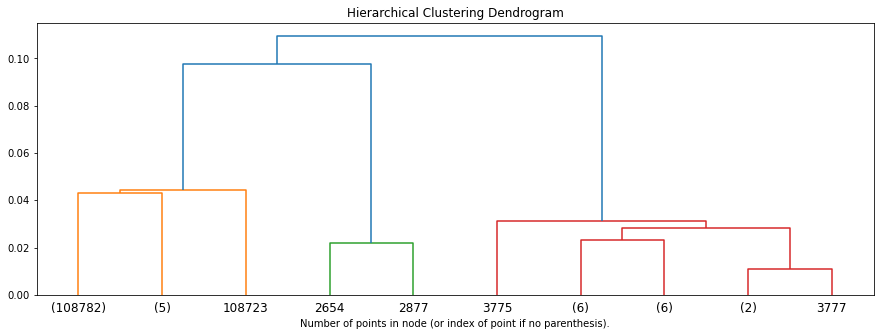

In [14]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the dendrogram
plot_dendrogram(clf_aggcl, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

#### С параметром linkage='ward'

In [15]:
# нехватает памяти

In [16]:
# clf_aggcl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

# clf_aggcl = clf_aggcl.fit(df.drop(columns='comment_class'))

In [17]:
# plt.figure(figsize=(15, 5))
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the dendrogram
# plot_dendrogram(clf_aggcl, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")

In [18]:
# distance_mat = pdist(df.drop(columns='comment_class'))

# Z= hierarchy.linkage(distance_mat, 'single')
# plt.figure(figsize=(15,5))
# dn = hierarchy.dendrogram(Z,color_threshold=0.5)

### 5. DBSCAN

In [19]:
# нехватает памяти

In [20]:
# model_dbscan = DBSCAN(eps=0.01)# подобрать eps
# y_pred = model_dbscan.fit_predict(df.drop(columns='comment_class'))
# plt.figure(figsize=(12,9))
# plt.scatter(df['x'], df['y'], c=y_pred)


### 6. AffinityPropagation

In [21]:
# нехватает памяти

In [22]:
# model_ap = AffinityPropagation()

# y_pred = model_ap.fit_predict(df.drop(columns='comment_class'))

In [23]:
# plt.figure(figsize=(8, 8))
# sns.scatterplot(data=df, x='x', y='y', hue=y_pred, legend='full', palette='Paired')

### 7. Исследование скопления голосов за и против

In [24]:
df['district'] = y_pred

Расположение голосов "за" и "против"

<AxesSubplot:xlabel='x', ylabel='y'>

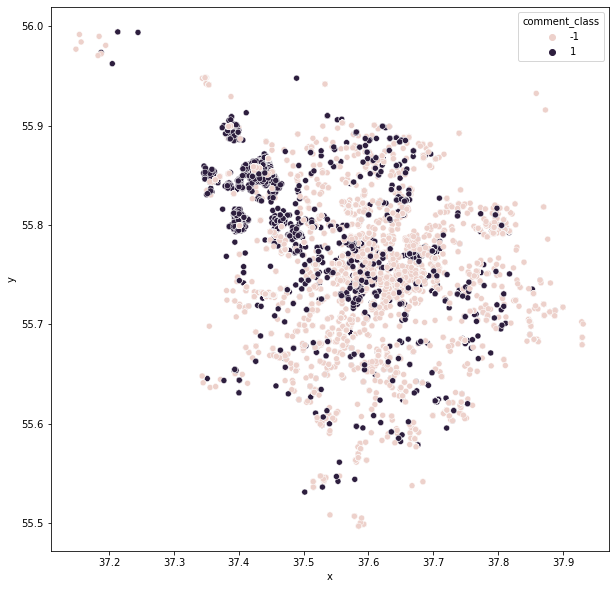

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='x', y='y', hue='comment_class')

In [26]:
vote_against = df[df['comment_class']==-1]
vote_for = df[df['comment_class']==1]

Расположение голосов "против"

<AxesSubplot:xlabel='x', ylabel='y'>

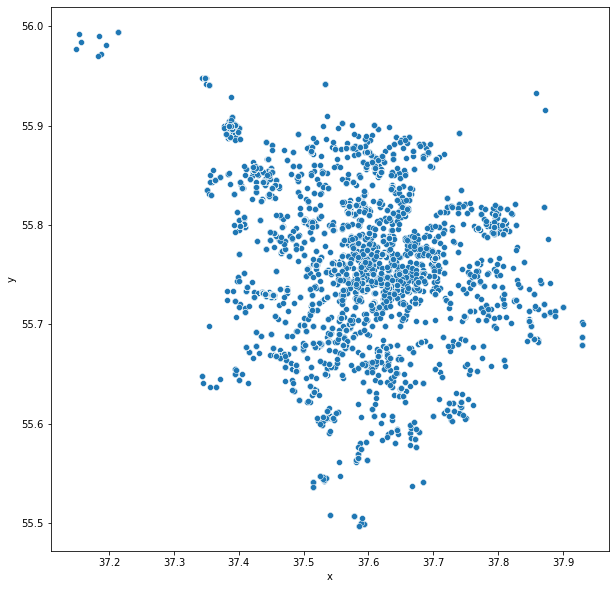

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=vote_against, x='x', y='y')

Расположение голосов "против" по районам

<AxesSubplot:xlabel='x', ylabel='y'>

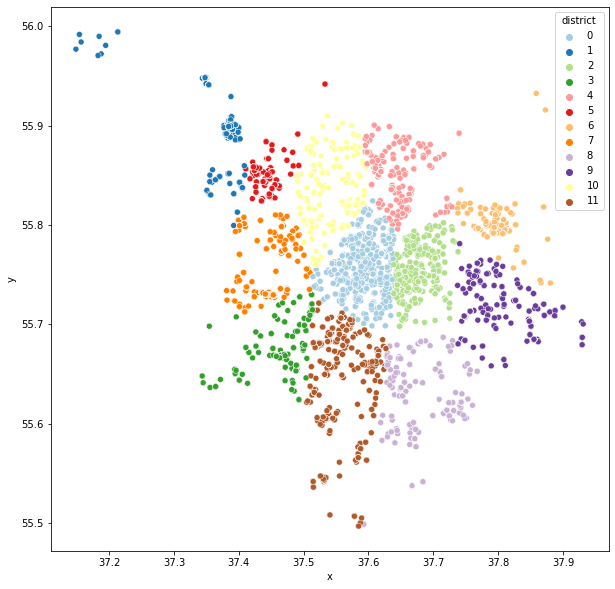

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=vote_against, x='x', y='y', hue='district', legend='full', palette='Paired' )

Расположение голосов "за"

<AxesSubplot:xlabel='x', ylabel='y'>

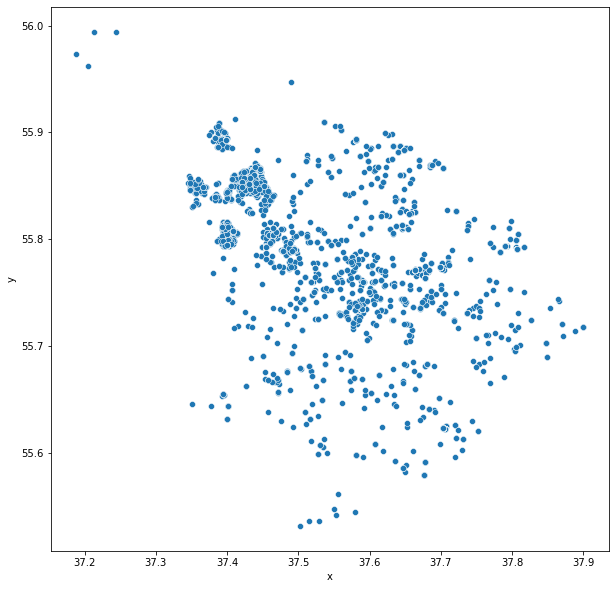

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=vote_for, x='x', y='y')

Расположение голосов "за" по районам

<AxesSubplot:xlabel='x', ylabel='y'>

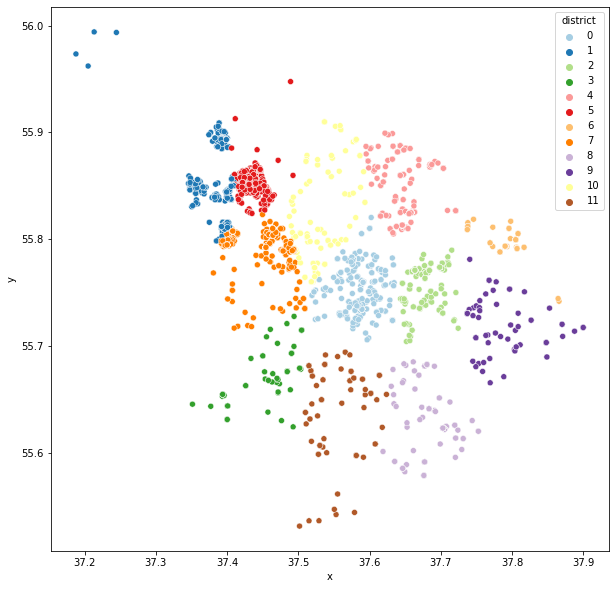

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=vote_for, x='x', y='y', hue='district', legend='full', palette='Paired' )

Top-5 самых активных районов

In [76]:
df.groupby(['district']).count().sort_values('x', ascending=False).head()

,x,y,comment_class
district,,,
0,21155,21155,21155
2,15393,15393,15393
3,13000,13000,13000
5,12155,12155,12155
7,10970,10970,10970


In [89]:
top_active = df.groupby(['district'])['comment_class'].count().sort_values(ascending=False).head().index.to_list()

Top-5 райнов проголосовавших "За"

In [66]:
df[df['comment_class']==1].groupby(['district']).count().sort_values('x', ascending=False).head()

,x,y,comment_class
district,,,
0,4354,4354,4354
6,2999,2999,2999
4,1609,1609,1609
5,1459,1459,1459
7,1026,1026,1026


In [86]:
top_for = df[df['comment_class']==1].groupby(['district']).count().sort_values('x', ascending=False).head().index.to_list()

Top-5 райнов проголосовавших "Против"

In [77]:
df[df['comment_class']==-1].groupby(['district']).count().sort_values('x', ascending=False).head()

,x,y,comment_class
district,,,
0,16801,16801,16801
2,15170,15170,15170
3,12923,12923,12923
5,10696,10696,10696
7,9944,9944,9944


In [87]:
top_against = df[df['comment_class']==-1].groupby(['district']).count().sort_values('x', ascending=False).head().index.to_list()

In [94]:
print('Всего голосов "За":\t\t', len(vote_for))
print('Всего голосов "Против":\t\t', len(vote_against))
print('________________________________________________\n')
print('Top-5 самых активных районов:\t', top_active)
print('Top-5 райнов "За":\t\t', top_for)
print('Top-5 районов "Против":\t\t', top_against)

Всего голосов "За":		 13659
Всего голосов "Против":		 95147
________________________________________________

Top-5 самых активных районов:	 [0, 2, 3, 5, 7]
Top-5 райнов "За":		 [0, 6, 4, 5, 7]
Top-5 районов "Против":		 [0, 2, 3, 5, 7]
